# Embeddings

This lab is designed to help you solidify your understanding of embeddings by applying them to tasks like semantic similarity, clustering, and building a semantic search system.

### Tasks:
- Task 1: Semantic Similarity Comparison
- Task 2: Document Clustering
- Task 3: Enhance the Semantic Search System


## Task 1: Semantic Similarity Comparison
### Objective:
Compare semantic similarity between pairs of sentences using cosine similarity and embeddings.

### Steps:
1. Load a pre-trained Sentence Transformer model.
2. Encode the sentence pairs.
3. Compute cosine similarity for each pair.

### Dataset:
- "A dog is playing in the park." vs. "A dog is running in a field."
- "I love pizza." vs. "I enjoy ice cream."
- "What is AI?" vs. "How does a computer learn?"


In [9]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Sentence pairs
sentence_pairs = [
    ("A dog is playing in the park.", "A dog is running in a field."),
    ("I love pizza.", "I enjoy ice cream."),
    ("What is AI?", "How does a computer learn?")
]

# Compute similarities
for sentence in sentence_pairs:
    # Compute cosine similarities
    similarities = cosine_similarity(model.encode([sentence[0]]), model.encode([sentence[1]]))
    print("Similarity Scores:", similarities)

Similarity Scores: [[0.5219753]]
Similarity Scores: [[0.52806807]]
Similarity Scores: [[0.3194349]]


### Questions:
- Which sentence pairs are the most semantically similar? Why?
- Can you think of cases where cosine similarity might fail to capture true semantic meaning?


## Task 2: Document Clustering
### Objective:
Cluster a set of text documents into similar groups based on their embeddings.

### Steps:
1. Encode the documents using Sentence Transformers.
2. Use KMeans clustering to group the documents.
3. Analyze the clusters for semantic meaning.

In [13]:
from sklearn.cluster import KMeans

# Documents to cluster
documents = [
    "What is the capital of France?",
    "How do I bake a chocolate cake?",
    "What is the distance between Earth and Mars?",
    "How do I change a flat tire on a car?",
    "What is the best way to learn Python?",
    "How do I fix a leaky faucet?"
]

# Encode documents

#YOUR CODE HERE
documents_encoded = model.encode(documents)

In [17]:
# Perform KMeans clustering
cluster = KMeans(n_clusters=3)
cluster.fit(documents_encoded)
#YOUR CODE HERE

KMeans(n_clusters=3)

In [18]:
# Print cluster assignments
cluster.labels_
#YOUR CODE HERE

array([1, 2, 1, 2, 0, 2])

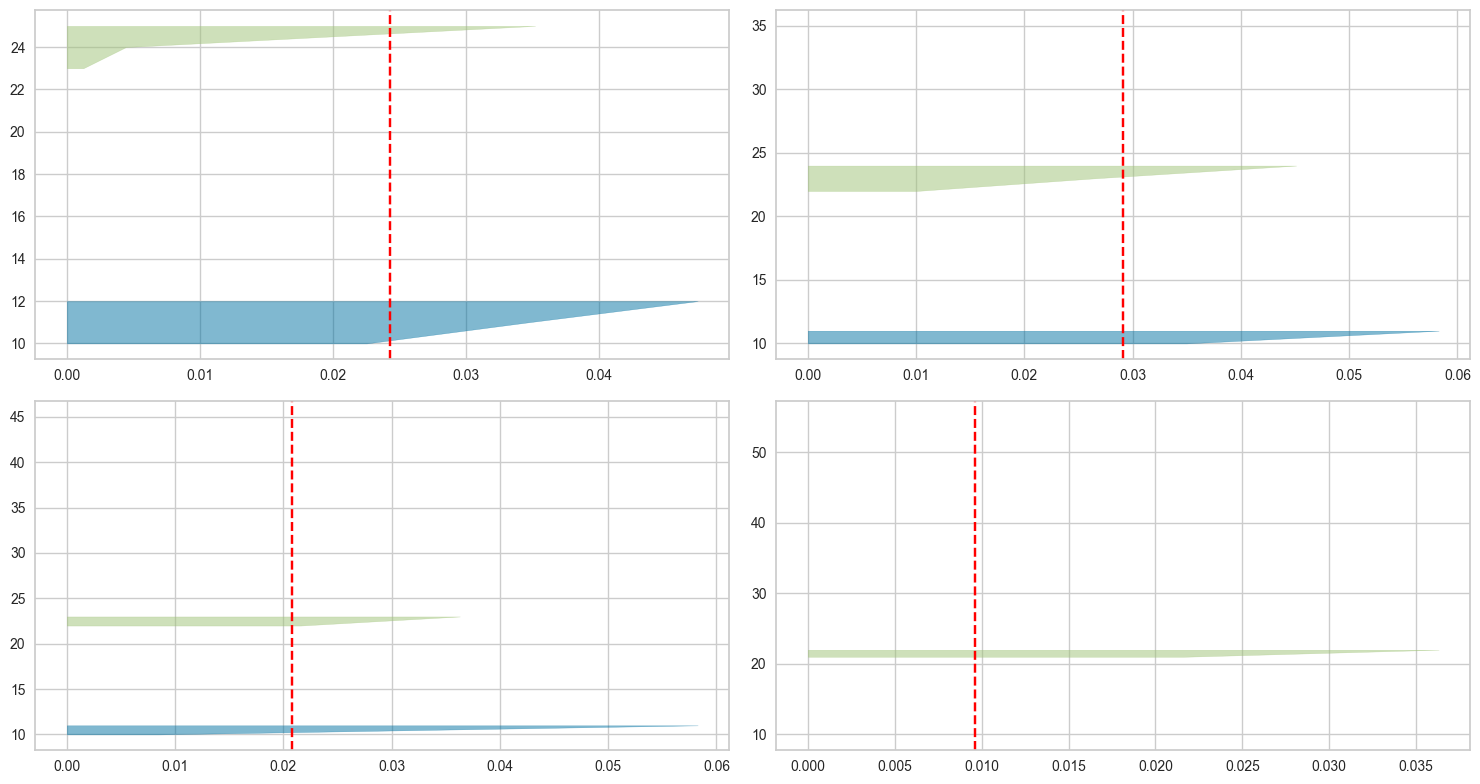

In [22]:

import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

# Setting up the matplotlib figure with multiple subplots
fig, ax = plt.subplots(2, 2, figsize=(15,8))

# Loop through different numbers of clusters (from 2 to 5)
for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    # 'k-means++' for smart centroid initialization, 10 different centroid initializations
    # 100 iterations max for each run, and set a random state for reproducibility
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)

    # Determine the position of the subplot
    q, mod = divmod(i, 2)

    # Create a SilhouetteVisualizer with the KMeans instance
    # Colors are set to 'yellowbrick' palette, and the subplot ax is defined
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])

    # Fit the visualizer to the data to produce the silhouette plot
    visualizer.fit(documents_encoded)

# Display the plot
plt.tight_layout()
plt.show()

c:\Programming\Ironhack\venv\Lib\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
c:\Programming\Ironhack\venv\Lib\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


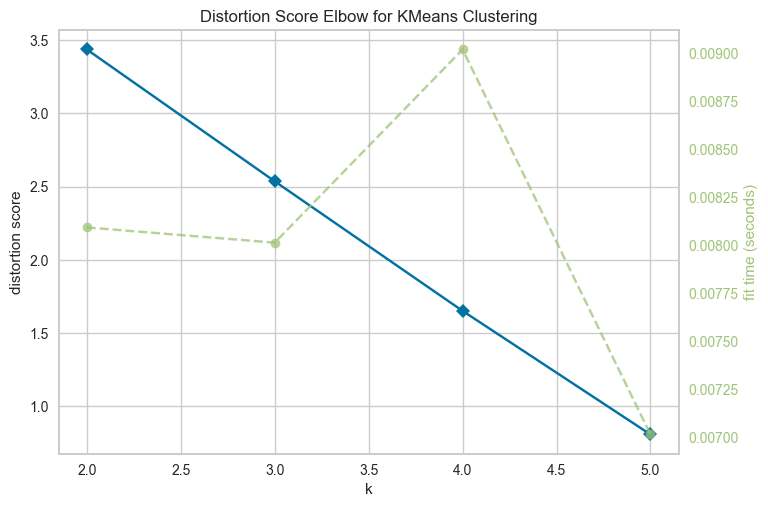

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the KMeans model
# random_state=42 is used for reproducibility of results
km = KMeans(random_state=42)

# Instantiate the KElbowVisualizer with the KMeans model
# k=(2,10) indicates the range of number of clusters to try (from 2 to 10)
visualizer = KElbowVisualizer(km, k=(2,6))

# Fit the visualizer to the data
# This will run K-means clustering for each value of k and calculate the distortion score for each
visualizer.fit(documents_encoded)

# Render the plot
# The Elbow plot displays the distortion score for each k
# The point where the distortion score starts to level off ('elbow') is the recommended number of clusters
visualizer.show()

### Questions:
- How many clusters make the most sense? Why?
- Examine the documents in each cluster. Are they semantically meaningful? Can you assign a semantic "theme" to each cluster?
- Try this exercise with a larger dataset of your choice

## Task 3: Semantic Search System
### Objective:
Create a semantic search engine:
A user provides a query and you search the dataset for semantically relevant documents to return. Return the top 5 results.

### Dataset:
- Use the following set of documents:
    - "What is the capital of France?"
    - "How do I bake a chocolate cake?"
    - "What is the distance between Earth and Mars?"
    - "How do I change a flat tire on a car?"
    - "What is the best way to learn Python?"
    - "How do I fix a leaky faucet?"
    - "What are the best travel destinations in Europe?"
    - "How do I set up a local server?"
    - "What is quantum computing?"
    - "How do I build a mobile app?"


In [24]:
import numpy as np

# Documents dataset
documents = [
    "What is the capital of France?",
    "How do I bake a chocolate cake?",
    "What is the distance between Earth and Mars?",
    "How do I change a flat tire on a car?",
    "What is the best way to learn Python?",
    "How do I fix a leaky faucet?",
    "What are the best travel destinations in Europe?",
    "How do I set up a local server?",
    "What is quantum computing?",
    "How do I build a mobile app?"
]

# Compute document embeddings
doc_embeddings = model.encode(documents)


In [73]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def semantic_search(query, documents, doc_embeddings, top_n=5):
    """
    Encode the query and return the top N most similar documents.
    
    query: str
    documents: list of str
    doc_embeddings: list or np.ndarray of embeddings for each document
    top_n: number of top results to return
    """
    # Encode query
    query_vector = model.encode([query])  # shape: (1, dim)

    # Compute cosine similarities (vectorized for speed)
    sims = cosine_similarity(query_vector, doc_embeddings)[0]  # shape: (num_docs,)

    # Get indices of top_n highest similarities
    top_indices = np.argsort(sims)[::-1][:top_n]

    # Return list of (document, score) pairs
    return [(documents[i], sims[i]) for i in top_indices]


### Questions:
- What are the top-ranked results for the given queries?
- How can you improve the ranking explanation for users?
- Try this approach with a larger dataset

In [74]:
results = semantic_search("Explain programming languages.", documents, doc_embeddings, top_n=3)
for doc, score in results:
    print(f"{score:.3f} - {doc}")

0.435 - What is quantum computing?
0.319 - What is the best way to learn Python?
0.110 - How do I build a mobile app?
